<img src="./Images/HW07_P02.png" width="700px">

In [1]:
# import dependencies 
import matplotlib.pyplot as plt 
import numpy as np

# Set size parameters for plots 
plt.rcParams.update({
    'figure.titlesize': 18,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11
})

<img src="./Images/HW07_P02(1).png" width="700px">


In [12]:
# ---- Program to solve the stationary Schrödinger equation using FDM for V(x) ---- 
def solve_SSE(Vp, xmin, xmax, n):
    ''' 
    Function to solve stationary Schrödinger equation for a given potential V(x)
    Arguments: 
        Vp: potential (function)
        xmin: minimum x value, left end-point
        xmax: maximum x value, right end-point
        n: number of endpoints
    Returns: 
        x: set of grid points
        y: eigenvectors 
        Ei: diagonal matrix of eigenvalues 
        n_states: number of bound states
    '''
    # --- create grid ---
    h = (xmax - xmin) / (n-1)   # spacing
    x = np.linspace(xmin, xmax, n)  # grid points 
    V_vals = Vp(x)  # potential points on grid 

    # --- create matrix A ---
    A = np.zeros((n,n))     # init to all zeros 

    # diagonal values: 1/h^2 + V(x_k)
    for k in range(n):
        A[k,k] = 1.0/h**2 + V_vals[k]

    # off diagonals: -1/(2h^2)
    for k in range(n-1):
        A[k, k+1] = -1.0/(2.0*h**2)
        A[k+1, k] = A[k, k+1]

    # --- Eigenvalues and Eigenvectors ---
    Ei, y = np.linalg.eigh(A)   # Ei = sorted list of eigenvals, y = ith eigenfunction

    # sort ascending - eigh should sort automatically, but sort to be sure. 
    ind = np.argsort(Ei)
    Ei = Ei[ind]
    y = y[:,ind]

    # --- Count bound states (Ei < V(xmax)) ---
    Emax = Vp(xmax)
    n_states = 0
    for k in range(n):
        if Ei[k] > Emax: 
            break
        n_states += 1

    # -- Normalization with Simpson's Rule ---
    # S[i] holds norm factor for state i 
    S = np.zeros(n_states)

    # Simpson rule for each bound state
    for i in range(n_states):
        S_i = 0.0
        for k in range(1, n-1, 2): 
            S_i += 4.0 * y[k, i]**2 
            S_i += 2.0 * y[k+1, i]**2 

        S_i += y[0, i]**2 -y[n-1, i]**2 

        S[i] = np.sqrt(S_i * h/3.0)

    # apply normalization 
    for i in range(n_states):
        y[:, i]/=S[i]

    return x, y, Ei, n_states

<img src = "./Images/HW07_p02(2).png" width="700px">

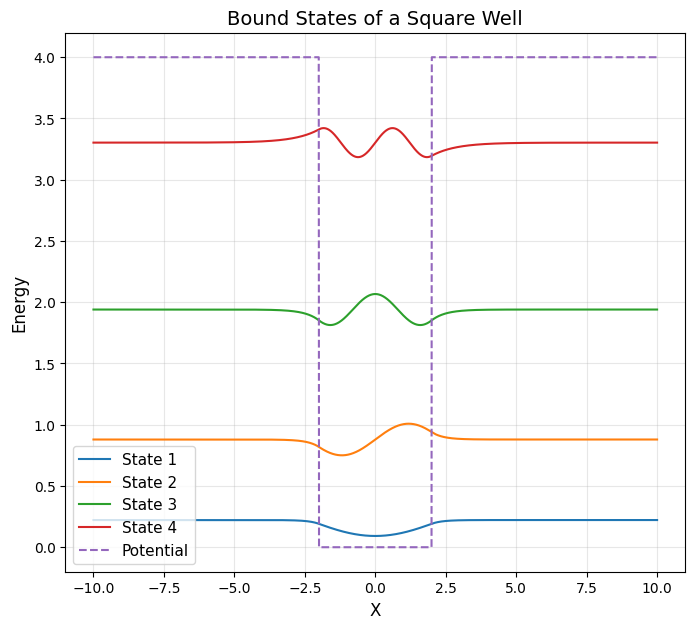

In [35]:
# ---- Square well potential ---- 
def V(x, a=2, V0=4): 
    ''' 
    Finite square well potential: 
    V = 0 inside well, |x| <= a 
    V = V0 outsize 
    '''
    return np.where(np.abs(x) <= a, 0.0, V0)

x, y, Ei, n_states = solve_SSE(V, -10, 10, 2000) 

plt.figure(figsize=(8,7))
plt.title("Bound States of a Square Well")
plt.xlabel("X")
plt.ylabel("Energy")
scale = 0.2
for i in range(n_states): 
    plt.plot(x, y[:, i] * scale + Ei[i], label=f"State {i+1}")
plt.plot(x, V(x), '--', label="Potential")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
